# SC1015 Mini Project: Signature Forgery Detection

  Welcome to our mini project! This first section will run you through the overview of what our project is about. We decided to follow the Datapipeline taught to us in the DataScience portion of this module: 
  
  1. __Practical Motivation:__ Why do we choose this problem?
  2. __Sample Collection:__ Which dataset do we use?
  3. __Problem Formulation:__ Rephrasing the problem into a datascience problem
  4. __Data Preparation:__ Steps needed to setup the dataset
  5. __Statistical Description:__ Statistics to describe our input data
  6. __Exploratory Analysis:__ What can we analyse from the statistics of our data?
  7. __Pattern Recognition:__ What patterns/features can we find from our data?
  8. __Analytic Visualization:__ How can we visualise what we're working with?
  9. __Machine Learning:__ Which model do we use to solve our problem?
  10. __Algorithmic Optimization:__ How can we optimise our algorithm? 
  11. __Statistical Inference:__ What can we infer from the results?
  12. __Information Presentation:__ Side by side comparison of the results

In [1]:
# Import relevant libraries
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
import seaborn as sb
from scipy import ndimage
from skimage.measure import regionprops
from skimage import io
from skimage.filters import threshold_otsu   # For finding the threshold for grayscale to binary conversion
from sklearn.linear_model import LogisticRegression
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 
import pandas as pd
import numpy as np
from time import time
import keras
from tqdm import tqdm
import tkinter as tk
from tkinter import *
from tkinter.filedialog import askopenfilename   

Instructions for updating:
non-resource variables are not supported in the long term


## Practical Motivation
  Signature forgery is a problem that bypasses an untrained eye. Not everyone has the patience to meticulously check the authenticity of thousands of documents. In fact, a Singaporean man was able to forge documents that helped him get 38 jobs in 4 years ([CNA](https://www.channelnewsasia.com/singapore/man-forge-documents-nus-degree-get-jobs-38-companies-890881), 2019). 
  ![Signature Forgery](https://www.martypearce.com/wp-content/uploads/2019/01/3e406f_00f3feb43e17449c8bfacc0f850bf362mv2.jpg)
  
  Forgery is a real concern and humans are bound to make mistakes when checking for forged documents. On a tiring day, we may not always be able to find forged documents and so our group strives to build a working model that can consistently detect Signature Forgery.

## Sample Collection
  The dataset we will be using is from Kaggle: [https://www.kaggle.com/datasets/robinreni/signature-verification-dataset](https://www.kaggle.com/datasets/robinreni/signature-verification-dataset). 
  It has the following directory:
* sign_data
  * test
  * train
  * test_data.csv
  * train_data.csv
  
  
1. There are a total of 2,149 images(png)
2. A training set of 64 different individuals' signatures, separated into a genuine and forged set of images
3. A test set of 21 different individuals' signatures, separated into a genuine and forged set of images

## Problem Formulation
  In terms of Data Science, this is definitely a "Classification" type of problem and we will be working with unstructured data, namely images. If we were to phrase this problem we would ask:
  
  __What is the probability of the signature being genuine or forged?__
  
  This is a binary type of classification

## Data Preparation

Before we start with the analyses of the dataset, we first restructure the folder layout of the dataset.

### **Before** 
```
Root_Folder
└── Dataset/
    ├── test/
    │   ├── 049/
    │   │   ├── 01_049.png
    │   │   ├── 02_049.png
    │   │   └── ...
    │   ├── 049_forg/
    │   │   ├── 01_0114049.png
    │   │   ├── 01_0206049.png
    │   │   └── ...
    │   ├── 050/
    │   ├── 050_forg/
    │   └── ...
    ├── train/
    │   ├── 001/
    │   │   ├── 001_01.png
    │   │   ├── 001_02.png
    │   │   └── ...
    │   ├── 001_forg/
    │   │   ├── 0119001_01.png
    │   │   ├── 0119001_02.png
    │   │   └── ...
    │   ├── 002/
    │   ├── 002_forg/
    │   └── ...
    ├── test_data.csv
    └── train_data.csv
```

### **After**
```
Root_Folder
└── Dataset/
    ├── test/
    │   ├── forged/
    │   │   ├── 049_forg/
    │   │   │   ├── 049_forg_01.png
    │   │   │   ├── 049_forg_02.png
    │   │   │   └── ...
    │   │   ├── 050_forg/
    │   │   ├── 051_forg/
    │   │   └── ...
    │   └── real/
    │       ├── 049/
    │       │   ├── 049_01.png
    │       │   ├── 049_02.png
    │       │   └── ...
    │       ├── 050/
    │       ├── 051/
    │       └── ...
    ├── train/
    │   ├── forged/
    │   │   ├── 001_forg/
    │   │   │   ├── 001_forg_01.png
    │   │   │   ├── 001_forg_02.png
    │   │   │   └── ...
    │   │   ├── 002_forg/
    │   │   └── ...
    │   └── real/
    │       ├── 001/
    │       │   ├── 001_01.png
    │       │   ├── 001_02.png
    │       │   └── ...
    │       ├── 002/
    │       └── ...
    ├── test_data.csv
    └── train_data.csv
```


We added 2 folders(real & forged) in each **train** and **test** folders to categorise the signatures for better access.

Next, we moved on to actual preparation of the data. As the data is already split into **train** and **test** set, we do not need further splitting of the data.

Additionally, no data cleaning is required as the images does not contain any noises(images are high definition of different signatures). Also, all the signatures have the been categorised based on the individuals, no further classifying the images is needed.

However, one thing we need to do is to convert the image into numerical value to do processing on the data extracted.

We have come up with 2 ways to convert the images into numerical values

    1) Converting images into 2D array of RGB values

    2) Converting images into different properties (will be covered more in depth later)

These 2 approaches will be used in the different solutions to address our problem.

### Image Conversion Method 1 - Converting images into 2D array of RGB Values. 

This is done using existing library (`cv2`) to read the image (`imread`) and convert them into RGB values

A detailed example is shown below

```python
img = cv2.imread(*filename*)
"""
Example value of img:

[[250 250 250 ... 250 250 250]
 [250 250 250 ... 250 250 250]
 [250 250 250 ... 250 250 250]
 ...
 [250 250 250 ... 250 250 250]
 [250 250 250 ... 250 250 250]
 [250 250 250 ... 250 250 250]]
"""
```

However, as our images are of different dimensions, we would need to resize/scale the images so that there are of the same dimensions. An example of the scaling function is shown below.

```python
"""
imageA: RGB values of first image
imageB: RGB values of second image
return: RGB values of both image A and image B

The function check for the smaller dimension 
of the images and scale up the smaller one 
to the dimension of the bigger one
"""
def image_resize(imageA, imageB):
    if not (imageA.shape == imageB.shape):
        # Scale the smaller dimension pictures
        if (imageA.shape < imageB.shape):
            dim = (imageB.shape[1], imageB.shape[0])
            imageA = cv2.resize(imageA, dim)
        elif (imageB.shape < imageA.shape):
            dim = (imageA.shape[1], imageA.shape[0])
            imageB = cv2.resize(imageB, dim)
        
    return imageA, imageB
```

## Statistical Description

### Feature extraction - Converting the preprocessed images into numbers and statistics that can be inputed into our CNN model. This data invokes the concept of clustering to classify data according to certain patterns. In this case, the patterns are the distinct features of a signature, namely:
| Name | Description |
| ---- |:-----------:|
| **ratio** |  The ratio of the width to height of the bounding box around the signature. |
| **cent_y** | The y-coordinate of the center of mass of the signature. |
| **cent_x** | The x-coordinate of the center of mass of the signature. |
| **eccentricity** | A measure of how elongated the signature is. |
| **solidity** | The ratio of the area of the signature to the area of the convex hull surrounding it. |
| **skew_x** | A measure of how asymmetric the signature is with respect to the x-axis. |
| **skew_y** | A measure of how asymmetric the signature is with respect to the y-axis. |
| **kurt_x** | A measure of how heavy the tails of the signature are with respect to the x-axis. | 
| **kurt_y** | A measure of how heavy the tails of the signature are with respect to the y-axis. |

##### The outputs '0' and '1' indicate whether the signature is genuine or forged, with '1' representing a genuine signature and '0' representing a forged signature.

### For our specific case, instead of classifying data into specific categories, we use numeric metrics to quantify how much of that particular feature that signature possesses. 

In [2]:
def Ratio(img):
    a = 0
    for row in range(len(img)):
        for col in range(len(img[0])):
            if img[row][col]==True:
                a = a+1
    total = img.shape[0] * img.shape[1]
    return a/total

In [3]:
def Centroid(img):
    numOfWhites = 0
    a = np.array([0,0])
    for row in range(len(img)):
        for col in range(len(img[0])):
            if img[row][col]==True:
                b = np.array([row,col])
                a = np.add(a,b)
                numOfWhites += 1
    rowcols = np.array([img.shape[0], img.shape[1]])
    centroid = a/numOfWhites
    centroid = centroid/rowcols
    return centroid[0], centroid[1]   # 1st row is the x-component, 2nd row is the y-component

In [4]:
def EccentricitySolidity(img):
    r = regionprops(img.astype("int8"))
    return r[0].eccentricity, r[0].solidity

In [5]:
def SkewKurtosis(img):
    h,w = img.shape
    x = range(w)  # columns value
    y = range(h)  # rows value
    #calculate projections along the x and y axes
    xp = np.sum(img,axis=0)
    yp = np.sum(img,axis=1)
    #centroid
    cx = np.sum(x*xp)/np.sum(xp)
    cy = np.sum(y*yp)/np.sum(yp)
    #standard deviation
    x2 = (x-cx)**2
    y2 = (y-cy)**2
    sx = np.sqrt(np.sum(x2*xp)/np.sum(img))
    sy = np.sqrt(np.sum(y2*yp)/np.sum(img))
    
    #skewness
    x3 = (x-cx)**3
    y3 = (y-cy)**3
    skewx = np.sum(xp*x3)/(np.sum(img) * sx**3)
    skewy = np.sum(yp*y3)/(np.sum(img) * sy**3)

    #Kurtosis
    x4 = (x-cx)**4
    y4 = (y-cy)**4
    # 3 is subtracted to calculate relative to the normal distribution
    kurtx = np.sum(xp*x4)/(np.sum(img) * sx**4) - 3
    kurty = np.sum(yp*y4)/(np.sum(img) * sy**4) - 3

    return (skewx , skewy), (kurtx, kurty)

In [6]:
def rgbgrey(img):
    # Converts rgb to grayscale
    greyimg = np.zeros((img.shape[0], img.shape[1]))
    for row in range(len(img)):
        for col in range(len(img[row])):
            greyimg[row][col] = np.average(img[row][col])
    return greyimg

In [7]:
def greybin(img):
    # Converts grayscale to binary
    blur_radius = 0.8
    img = ndimage.gaussian_filter(img, blur_radius)  # to remove small components or noise
#     img = ndimage.binary_erosion(img).astype(img.dtype)
    thres = threshold_otsu(img)
    binimg = img > thres
    binimg = np.logical_not(binimg)
    return binimg

In [8]:
def preproc(path, img=None, display=True):
    if img is None:
        img = mpimg.imread(path)
    if display:
        plt.imshow(img)
        plt.show()
    grey = rgbgrey(img) #rgb to grey
    if display:
        plt.imshow(grey, cmap = matplotlib.cm.Greys_r)
        plt.show()
    binimg = greybin(grey) #grey to binary
    if display:
        plt.imshow(binimg, cmap = matplotlib.cm.Greys_r)
        plt.show()
    r, c = np.where(binimg==1)
    # Now we will make a bounding box with the boundary as the position of pixels on extreme.
    # Thus we will get a cropped image with only the signature part.
    signimg = binimg[r.min(): r.max(), c.min(): c.max()]
    if display:
        plt.imshow(signimg, cmap = matplotlib.cm.Greys_r)
        plt.show()
    return signimg

#####  `getFeatures()` function extracts the numerical values of the various features, and returns the data in the form of a tuple


##### `getCSVFeatures()` uses this tuple and reorders it to make it suitable for writing into a CSV

##### all the functions mentioned above, including `getFeatures()`, are helper functions for `getCSVFeatures()` 


In [9]:
def getFeatures(path, img=None, display=False):
    if img is None:
        img = mpimg.imread(path)
    img = preproc(path, display=display)
    ratio = Ratio(img)
    centroid = Centroid(img)
    eccentricity, solidity = EccentricitySolidity(img)
    skewness, kurtosis = SkewKurtosis(img)
    retVal = (ratio, centroid, eccentricity, solidity, skewness, kurtosis)
    return retVal

In [10]:
def getCSVFeatures(path, img=None, display=False):
    if img is None:
        img = mpimg.imread(path)
    temp = getFeatures(path, display=display)
    features = (temp[0], temp[1][0], temp[1][1], temp[2], temp[3], temp[4][0], temp[4][1], temp[5][0], temp[5][1])  
    '''
    For example:
    
           temp = getFeatures()      ->       features = getCSVFeatures()
            col 0:         col 1:          (ratio, cent_y, cent_x, eccentricity, solidity, skew_y, skew_x, kurt_y, kurt_x)
    row 0: [ratio               ]
    row 1: [cent_y        cent_x]
    row 2: [eccentricity        ]
    row 3: [solidity            ]
    row 4: [skew_y        skew_x]
    row 5: [kurt_x        kurt_y]
    ''' 
    return features

### Saving the features

##### Saves the numerical variables of the signatures into an Excel CSV file

In [11]:
def makeCSV(setType):
    # if the specified folder does not exist, create it to store the incoming CSV
    if not(os.path.exists('../Dataset/Features')):          
        os.mkdir('../Dataset/Features')   
        print('New folder "Features" created')
    if not(os.path.exists('../Dataset/Features/Training')):
        os.mkdir('../Dataset/Features/Training')
        print('New folder "Features/Training" created')
    if not(os.path.exists('../Dataset/Features/Testing')):
        os.mkdir('../Dataset/Features/Testing')
        print('New folder "Features/Testing" created')
   
    # Check what type
    if(setType != 'train' and setType != 'test'):
        print('Invalid type!')
        return
    
    if(setType == 'train'):
        gpath = genuine_image_paths_train
        fpath = forged_image_paths_train
        csvpath = '../Dataset/Features/Training/training_'
        setRange = range(1, 70)
    else:
        gpath = genuine_image_paths_test
        fpath = forged_image_paths_test
        csvpath = '../Dataset/Features/Testing/testing_'
        setRange = range(49, 70)
    

    # Extracting features based on type defined: 'train' ranges from 1-69, 'test' ranges from 49-69
    for person in tqdm(setRange, desc='Extracting Features...'):
        per = ('00'+str(person))[-3:]
               
        # In case folder is not iterative (i.e, 005 does not exist)
        if not(os.path.exists(os.path.join(gpath, per))):
            continue
    
        # In case folder is not iterative (i.e, 005 does not exist)
        if not(os.path.exists(os.path.join(fpath, per+'_forg'))):
            continue
    
        # every signature image will generate a unique CSV feature row specific to it, hence the concatenation
        with open(csvpath+per+'.csv', 'w') as handle:
            handle.write('ratio,cent_y,cent_x,eccentricity,solidity,skew_x,skew_y,kurt_x,kurt_y,output\n')

            # Genuine set
            i = 1
            fileNum = ('0' + str(i))[-2:]  # this takes care of single vs double digits
            filePath = os.path.join(gpath, per,  per + '_' + fileNum + '.png')
            while(os.path.exists(filePath)):
                source = filePath   # source image taken iteratively based on their own naming convention  
                features = getCSVFeatures(path=source)
                handle.write(','.join(map(str, features))+',1\n')  # 1 is set for genuine signatures 
                i += 1
                fileNum = ('0' + str(i))[-2:]  # this takes care of single vs double digits
                filePath = os.path.join(gpath, per,  per + '_' + fileNum + '.png')
                
            # Forged set
            i = 1
            fileNum = ('0' + str(i))[-2:]  # this takes care of single vs double digits
            filePath = os.path.join(fpath, per+'_forg',  per + '_forg_' + fileNum + '.png')
            while(os.path.exists(filePath)):
                source = filePath   # source image taken iteratively based on their own naming convention  
                features = getCSVFeatures(path=source)
                handle.write(','.join(map(str, features))+',0\n')  # 0 is set for genuine signatures 
                i += 1
                fileNum = ('0' + str(i))[-2:]  # this takes care of single vs double digits
                filePath = os.path.join(fpath, per+'_forg',  per + '_forg_' + fileNum + '.png')   

In [12]:
# Uncomment to rerun the feature extraction process
# makeCSV('train')
# makeCSV('test')

## Exploratory Analysis

## MSE Approach

One way we can approach the problem is to find the **MSE** between 2 images. This will give us the similarity of the 2 images, the lower the MSE, the more similar it is. 

Before we proceed, as the dataset is already split into **train set** and **test set**, we do not have to further split them into train and test set. We will use the existing train and test set split in our detection. 

As the dataset is in the form of picture (_.png_), we have to find ways to convert them into statistical data so we can use the **MSE** approach. One of the ways is to convert the pictures into 2D array of RGB representing the pictures.

Text(0.5, 1.0, 'Signature with another signature')

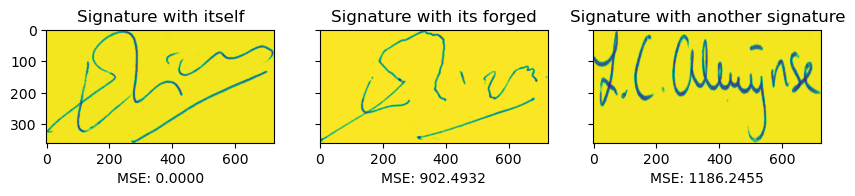

In [13]:
# Import libraries
import cv2 
import numpy as np
from matplotlib import pyplot as plt

from skimage.metrics import mean_squared_error

# Define folder structure as a constant
DATASET_FOLDER = "../Dataset"
TEST_SET_FOLDER = "/test"
TRAIN_SET_FOLDER = "/train"

# Define image dimension check and resize if not the same
def image_resize(imageA, imageB):
    if not (imageA.shape == imageB.shape):
        # Scale the smaller dimension pictures
        if (imageA.shape < imageB.shape):
            dim = (imageB.shape[1], imageB.shape[0])
            imageA = cv2.resize(imageA, dim)
        elif (imageB.shape < imageA.shape):
            dim = (imageA.shape[1], imageA.shape[0])
            imageB = cv2.resize(imageB, dim)
        
    return imageA, imageB


img_001_real = cv2.imread(DATASET_FOLDER + TRAIN_SET_FOLDER + '/real/001/001_01.png', 0)
img_001_forged = cv2.imread(DATASET_FOLDER + TRAIN_SET_FOLDER + '/forged/001_forg/001_forg_01.png',0)

# Resize the images if they are not the same
img_001_real , img_001_forged=  image_resize(img_001_real,img_001_forged)

# Setting up plots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10,4), sharex=True, sharey=True)
ax = axes.ravel()

img_001_real = cv2.fastNlMeansDenoising(img_001_real, None)
img_001_forged = cv2.fastNlMeansDenoising(img_001_forged, None)

# Calculate MSE of signature 1 and itself
MSE = mean_squared_error(img_001_real,img_001_real)
ax[0].imshow(img_001_real)
ax[0].set_xlabel(f'MSE: {MSE:.4f}')
ax[0].set_title('Signature with itself')


# Calculate MSE of signature 1 and its forged
MSE = mean_squared_error(img_001_real,img_001_forged)
ax[1].imshow(img_001_forged)
ax[1].set_xlabel(f'MSE: {MSE:.4f}')
ax[1].set_title('Signature with its forged')

img_002_real = cv2.imread(DATASET_FOLDER + TRAIN_SET_FOLDER + '/real/002/002_02.png',0)
img_001_real , img_002_real=  image_resize(img_001_real,img_002_real)
img_002_real = cv2.fastNlMeansDenoising(img_002_real, None)
# Calculate MSE of signature 1 and signature 2
MSE = mean_squared_error(img_001_real,img_002_real)
ax[2].imshow(img_002_real)
ax[2].set_xlabel(f'MSE: {MSE:.4f}')
ax[2].set_title('Signature with another signature')


As shown above, we can see that the MSE of real and forged is below **1000** whereas MSE of image1 and image2 has a MSE of above **1000**. Additionally, MSE of **0** implies the images are identical.

Using MSE as an approach to identify forgery is not an ideal solution as MSE **below 1000** should be considered as *similar/genuine* but in our case forged signature is considered genuine - hence a **false positive** result.

We have to find another approach of finding similarity of images, which we have taken **SSIM** as another approach.

## SSIM Approach

**SSIM**, stands for **Structural Similarity Index**,  is another method to find similarity between 2 images. It works somewhat similar to MSE but it is more in depth in which it consider other areas as well. 

There is a library for SSIM which is by skimage. We will use the library.

Text(0.5, 1.0, 'Signature with another signature')

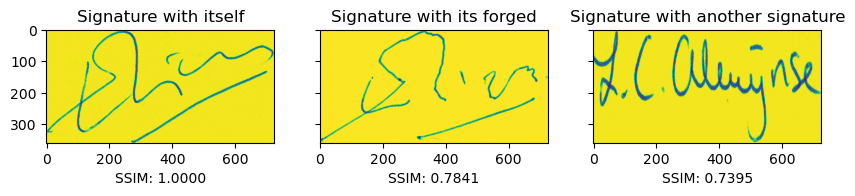

In [14]:
from skimage.metrics import structural_similarity as ssim


img_001_real = cv2.imread(DATASET_FOLDER + TRAIN_SET_FOLDER + '/real/001/001_01.png', 0)
img_001_forged = cv2.imread(DATASET_FOLDER + TRAIN_SET_FOLDER + '/forged/001_forg/001_forg_01.png',0)


# Resize the images if they are not the same
img_001_real , img_001_forged=  image_resize(img_001_real,img_001_forged)


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10,4), sharex=True, sharey=True)
ax = axes.ravel()


# Calculate MSE of signature 1 and itself
SSIM = ssim(img_001_real,img_001_real)
ax[0].imshow(img_001_real)
ax[0].set_xlabel(f'SSIM: {SSIM:.4f}')
ax[0].set_title('Signature with itself')


# Calculate SSIM of signature 1 and its forged
SSIM = ssim(img_001_real, img_001_forged)
ax[1].imshow(img_001_forged)
ax[1].set_xlabel(f'SSIM: {SSIM:.4f}')
ax[1].set_title('Signature with its forged')


img_002_real = cv2.imread(DATASET_FOLDER + TRAIN_SET_FOLDER + '/real/002/002_02.png',0)
img_001_real , img_002_real=  image_resize(img_001_real,img_002_real)

# Calculate SSIM of signature 1 and signature 2
SSIM = ssim(img_001_real,img_002_real)
ax[2].imshow(img_002_real)
ax[2].set_xlabel(f'SSIM: {SSIM:.4f}')
ax[2].set_title('Signature with another signature')


The value of SSIM ranges from 0 to 1, 0 means it is totally different image whereas 1 means it is totally identical. Hence, the higher the value of SSIM, the more identical the images are.

## Pattern Recognition & Analytic Visualization

After extracting the information of the images and put them into a single CSV file, we can obtained a simple statistical data visualization. We will do a scatterplot of 3 variables

1. cent_x , cent_y
2. skew_x, skew_y
3. kurt_x, kurt_y

This 3 variables are correlated to each other, hence we can plot them in a graph

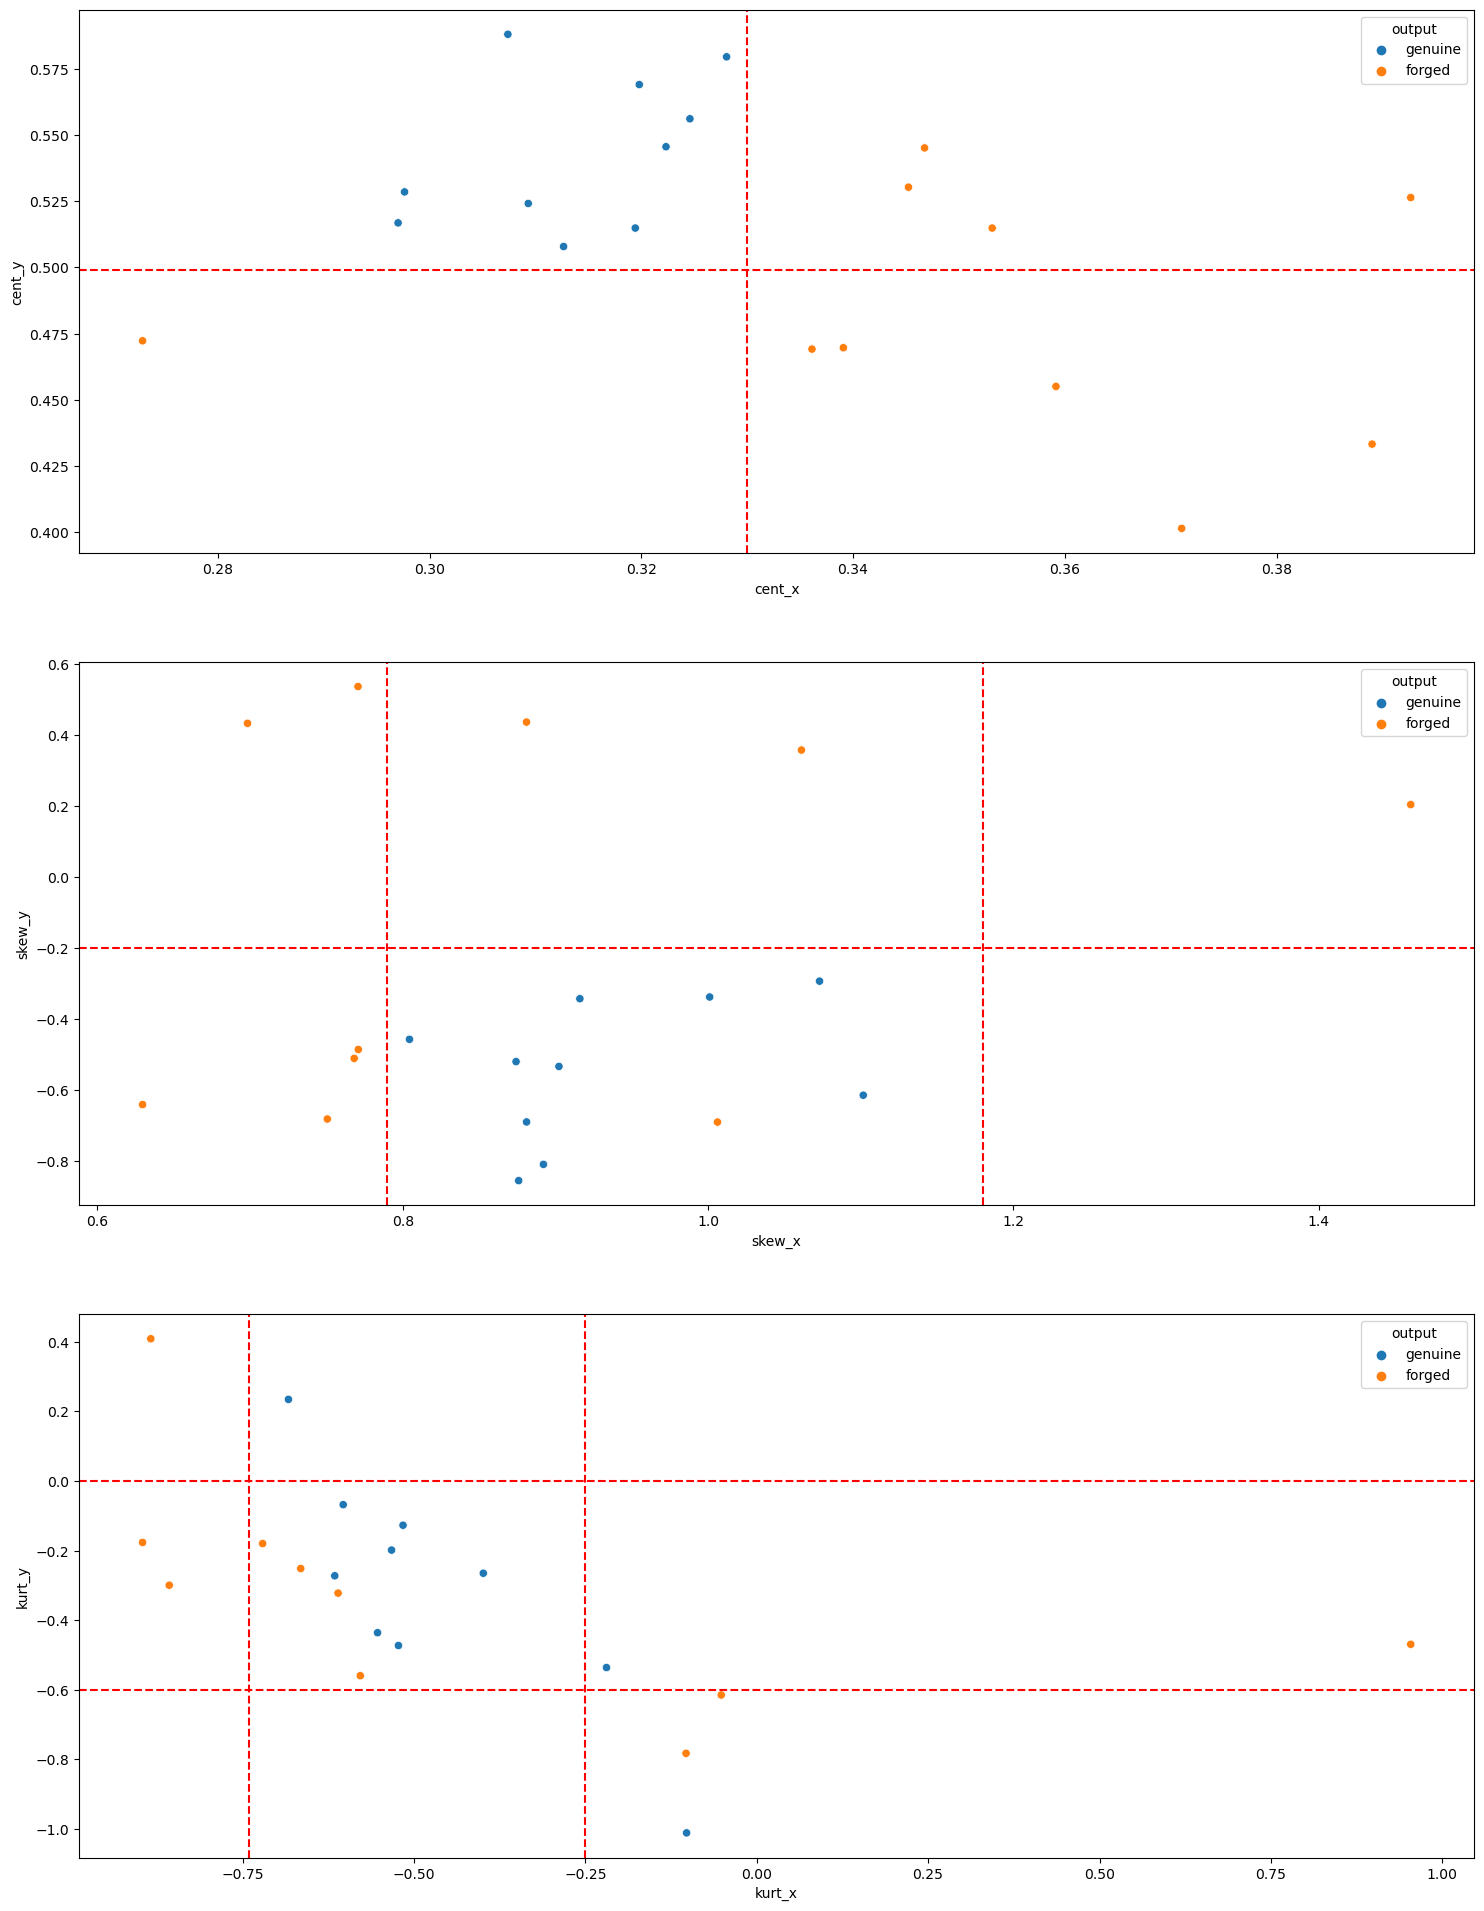

In [15]:
# read the csv file
# e.g person 1 signatures
features = pd.read_csv("../Dataset/Features/Training/training_057.csv")
genuine = features.loc[features['output'] == 1]
forged = features.loc[features['output'] == 0]


# renaming the output column to 
# 0 = forged
# 1 = genuine

features['output'] = features['output'].replace({0:'forged', 1:'genuine'})
f, axes = plt.subplots(3
                       ,1, figsize=(18,24))

sb.scatterplot(data = features,x='cent_x',y='cent_y',hue='output', ax=axes[0])
axes[0].axvline(x=0.33, color='red', linestyle='--')
axes[0].axhline(y=0.499, color='red', linestyle='--')
sb.scatterplot(data=features , x="skew_x" ,y='skew_y', hue='output', ax=axes[1])
axes[1].axvline(x=0.79, color='red', linestyle='--')
axes[1].axvline(x=1.18, color='red', linestyle='--')
axes[1].axhline(y=-0.2, color='red', linestyle='--')
sb.scatterplot(data=features , x='kurt_x' ,y='kurt_y' ,hue='output', ax=axes[2])
axes[2].axvline(x=-0.74, color='red', linestyle='--')
axes[2].axvline(x=-0.25, color='red', linestyle='--')
axes[2].axhline(y=-0.6, color='red', linestyle='--')
axes[2].axhline(y=0, color='red', linestyle='--')

As we can see, there is a general pattern observed with the signature. A real signature will have its characteristics clustering at one area. The explanation is simple: the person who signed it will have a similar features to its signature and will not deviate much away from the habit.

Another way to plot the variables is a plotting itself with the output. Here these 2 variables do not have a correlation with others, hence we will just plot itself against the output.

1. eccentricity
2. solidity


<AxesSubplot:xlabel='solidity', ylabel='output'>

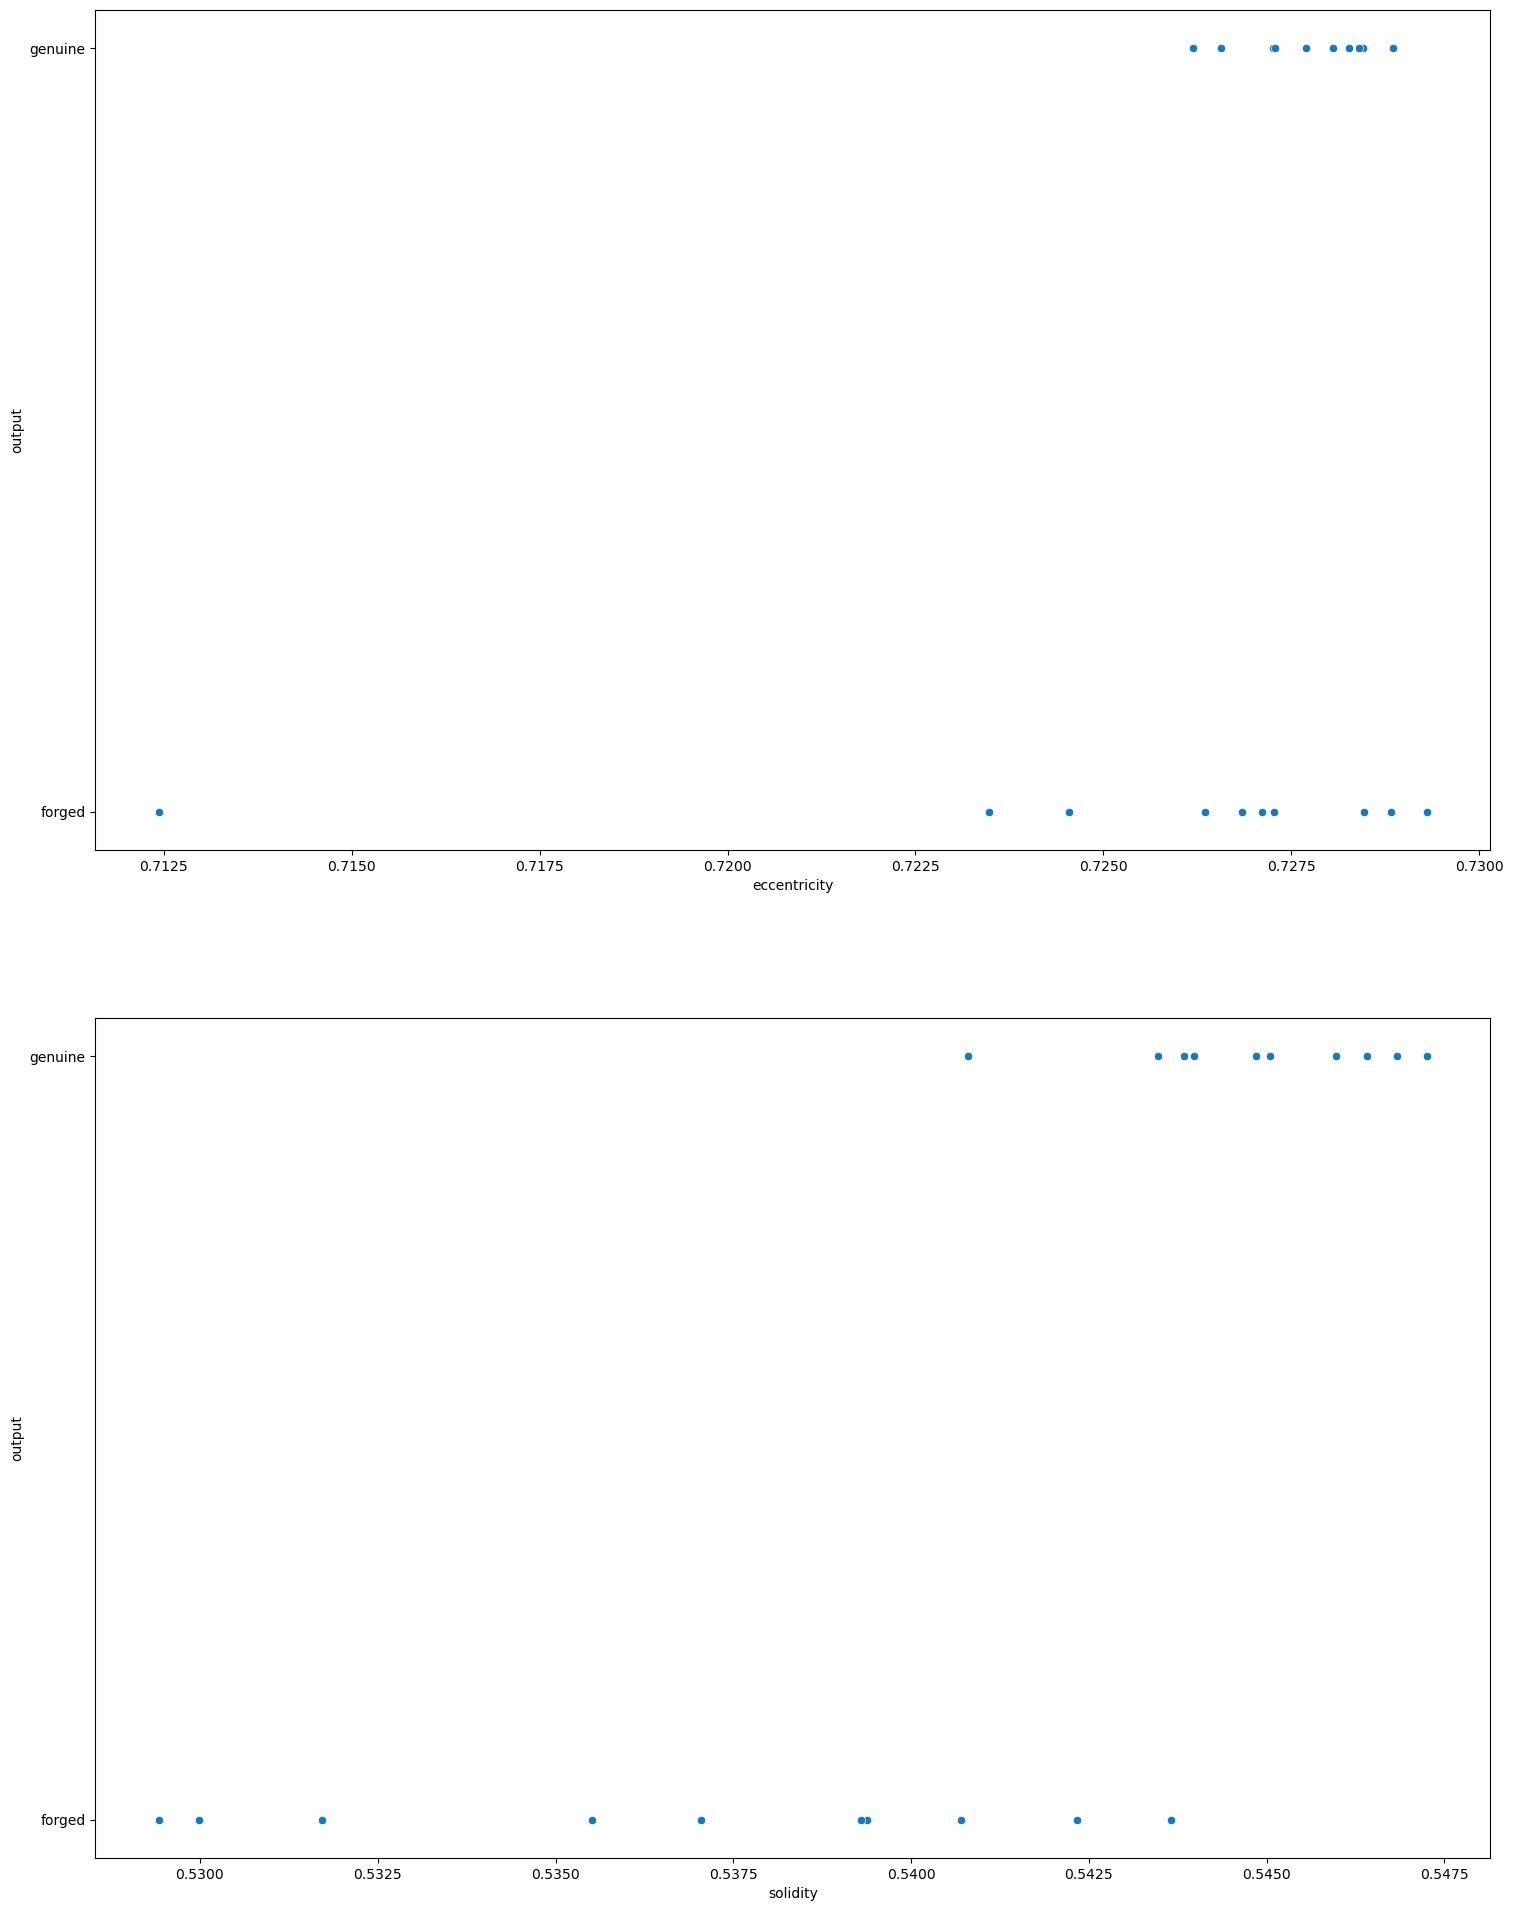

In [16]:

f, axes = plt.subplots(2
                       ,1, figsize=(18,24))
x_axis = 1/(1 + np.exp(-features['eccentricity']))
sb.scatterplot(x=x_axis, y=features['output'], ax = axes[0])

x_axis = 1/(1 + np.exp(-features['solidity']))
sb.scatterplot(x=x_axis, y=features['output'], ax = axes[1])

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


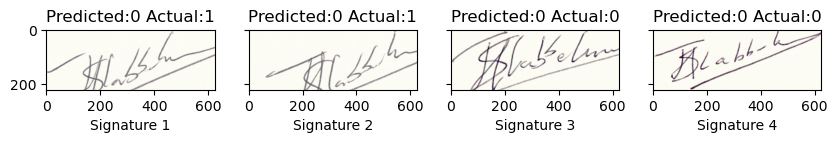

In [17]:
features['output'] = features['output'].replace({'genuine':1, 'forged':0})
x_train = features.iloc[: , :-1]
y_train = pd.DataFrame(features['output'])
log_regre = LogisticRegression()
log_regre.fit(x_train,y_train)

x_test = pd.read_csv("../Dataset/Features/Testing/testing_050.csv")
x_test_with_output = x_test
x_test = x_test.iloc[: , :-1]

prediction = log_regre.predict(x_test)

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10,4), sharex=True, sharey=True)
ax = axes.ravel()
count = 0

for file in os.listdir("../Dataset/test/real/050"):
    image = cv2.imread("../Dataset/test/real/050/"+file)
    ax[count].imshow(image)
    ax[count].set_title("Predicted:"+str(prediction[count])+" Actual:"+ str(x_test_with_output['output'].iloc[count]))
    ax[count].set_xlabel("Signature "+ str(count+1))
    count+=1
for file in os.listdir("../Dataset/test/forged/050_forg"):
    image = cv2.imread("../Dataset/test/forged/050_forg/"+file)
    ax[count].imshow(image)
    ax[count].set_title("Predicted:"+str(prediction[count])+" Actual:"+ str(x_test_with_output['output'].iloc[count]))
    ax[count].set_xlabel("Signature "+ str(count+1))
    count+=1
    

Text(0.5, 23.52222222222222, 'Predicted')

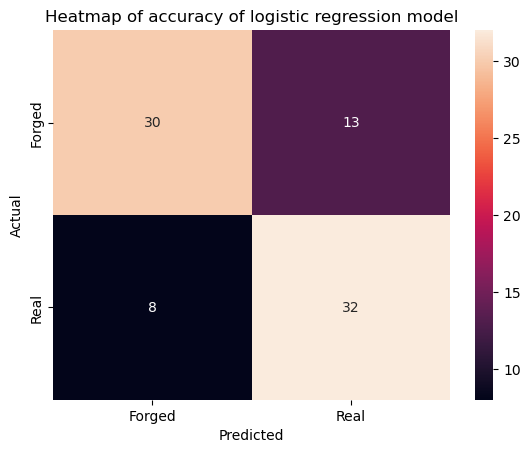

In [18]:
import warnings
warnings.filterwarnings('ignore')

#2D array to be displayed in heatmap
#        fake[      |     ]
# actual     [      |     ]
#        real[      |     ]
#               fake  real
#              Predicted

heatmap_result = np.array([[0,0], [0,0]])

for i in range(50,70,1):
    features = pd.read_csv("../Dataset/Features/Training/training_0"+str(i)+".csv")
    x_train = features.iloc[: , :-1]
    y_train = pd.DataFrame(features['output'])
    
    logreg = LogisticRegression()
    logreg.fit(x_train,y_train)
    test_set = pd.read_csv("../Dataset/Features/Testing/testing_0"+str(i)+".csv")
    x_test = test_set.iloc[: , :-1]
    prediction = logreg.predict(x_test)
    count = 0
    for predict in prediction:
        # predict real
        if predict == 1:
            if test_set['output'].iloc[count] == 1:
                heatmap_result[1][1] = heatmap_result[1][1] +1
            else:
                heatmap_result[0][1] = heatmap_result[0][1] +1
        # predict fake
        elif predict == 0:
            if test_set['output'].iloc[count] == 1:
                heatmap_result[1][0] = heatmap_result[1][0]+1
            else:
                heatmap_result[0][0] = heatmap_result[0][0]+1
        count+=1
heatmap_result = pd.DataFrame(heatmap_result, index=["Forged","Real"], columns=["Forged","Real"])
sb.heatmap(data=heatmap_result, annot=True)
plt.title("Heatmap of accuracy of logistic regression model")
plt.ylabel("Actual")
plt.xlabel("Predicted")

## Algorithmic Optimization

As **logistic regression** may not be optimal in categorising the signatures due to many outliers in the dataset. Hence, we have decided to adopt a more accurate model - **CNN**

CNN which stands for Convolutional Neural Network, is one of a neural network which specialises in its image recognition and tasks involving processing of pixel data.

CNN consist of 3 layers - convolution layer, pooling layer and fully connected layer

<img src="../Images/cnn_layers.png">

### Helper Functions for our CNN portion

In [40]:
def testing(path):    # path is the image specified
    feature = getCSVFeatures(path)   # extract features from a specific image into a tuple, suitable for storing into CSV 
    if not(os.path.exists('../Dataset/TestFeatures')):
        os.mkdir('../Dataset/TestFeatures')
    with open('../Dataset/TestFeatures/testcsv.csv', 'w') as handle:
        # create a new CSV to store the numerical features of the signature image, similar to makeCSV
        handle.write('ratio,cent_y,cent_x,eccentricity,solidity,skew_x,skew_y,kurt_x,kurt_y\n')
        handle.write(','.join(map(str, feature))+'\n')

def readCSV(train_path, test_path, type2=False):
    # Reading train data
    df = pd.read_csv(train_path, usecols=range(n_input))
    train_input = np.array(df.values)
    train_input = train_input.astype(np.float32, copy=False)  # Converting input to float_32
    df = pd.read_csv(train_path, usecols=(n_input,))
    temp = [elem[0] for elem in df.values]
    correct = np.array(temp)
    corr_train = keras.utils.to_categorical(correct,2)      # Converting to one hot
    
    # Reading test data
    df = pd.read_csv(test_path, usecols=range(n_input))
    test_input = np.array(df.values)
    test_input = test_input.astype(np.float32, copy=False)
    
    if not(type2):
        df = pd.read_csv(test_path, usecols=(n_input,))
        temp = [elem[0] for elem in df.values]
        correct = np.array(temp)
        corr_test = keras.utils.to_categorical(correct,2)      # Converting to one hot
        return train_input, corr_train, test_input, corr_test
    else:
        return train_input, corr_train, test_input

# Create model
def multilayer_perceptron(x):
    layer_1 = tf.tanh((tf.matmul(x, weights['h1']) + biases['b1']))
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
    out_layer = tf.tanh(tf.matmul(layer_1, weights['out']) + biases['out'])
    return out_layer

def evaluate(train_path, test_path, type2=False):   
    if not(type2):
        train_input, corr_train, test_input, corr_test = readCSV(train_path, test_path)
    else:
        train_input, corr_train, test_input = readCSV(train_path, test_path, type2)
    ans = 'Random'
    with tf.Session() as sess:
        sess.run(init)
        # Training cycle
        for epoch in range(training_epochs):
            # Run optimization op (backprop) and cost op (to get loss value)
            _, cost = sess.run([train_op, loss_op], feed_dict={X: train_input, Y: corr_train})
            if cost < 0.0001:
                break
#              # Display logs per epoch step
#             if epoch % 999 == 0:
#                 print("Epoch:", '%04d' % (epoch+1), "cost={:.9f}".format(cost))
#                 print("Optimization Finished!")
#                 print()        

        if type2 is False:
            # Finding accuracies
            accuracy1 =  accuracy.eval({X: train_input, Y: corr_train})
            print("Accuracy for train: {0:.2f} %".format(accuracy1*100))
            accuracy2 =  accuracy.eval({X: test_input, Y: corr_test})
            print("Accuracy for test: {0:.2f} %".format(round(accuracy2*100)))
            return accuracy1, accuracy2
        else:
            prediction = pred.eval({X: test_input})
            if prediction[0][1]>prediction[0][0]:
                print('Genuine Image: {0:.1f} %'.format(prediction[0][1]*100))
                return True
            else:
                print('Forged Image: {0:.1f} %'.format(prediction[0][0]*100))
                return False


def trainAndTest(rate=0.001, epochs=1700, neurons=7, display=False, firstPerson = 49, lastPerson = 69):    
    start = time()

    # Parameters
    global training_rate, training_epochs, n_hidden_1
    learning_rate = rate
    training_epochs = epochs

    # Network Parameters
    n_hidden_1 = neurons # 1st layer number of neurons
    n_hidden_2 = 7 # 2nd layer number of neurons
    n_hidden_3 = 30 # 3rd layer

    train_avg, test_avg = 0, 0
    n = lastPerson - firstPerson + 1
    for i in range(firstPerson, lastPerson+1):
        id = ('00'+str(i))[-3:]
        if display:
            print()
            print("Running for Person id",id)
        train_score, test_score = evaluate(train_path.replace(('0'+str(firstPerson)),id), test_path.replace(('0'+str(firstPerson)),id))
        train_avg += train_score
        test_avg += test_score
    if display:
#         print("Number of neurons in Hidden layer-", n_hidden_1)
        print()
        print("Training average: {0:.2f}%".format((train_avg/n)*100))
        print("Testing average:{0:.2f}%".format((test_avg/n)*100))
        print("Time taken:{0:.2f}s".format(time()-start))
        print()
    return train_avg/n, test_avg/n, (time()-start)

# Main Menu helper function
def printMenu():
    print("Welcome to our project! Select from the options below:")
    print("[1] Upload image")
    print("[2] Run model on dataset and see accuracy")
    print("[3] Exit")
    
# Test Image Helper function
def testImage():
    # User specifies the person id
    i = 0
    while(True):
        try:
            i = int(input("Enter person's id:"))
        except:
            print("Not a number! Try again...")
        else:
            if(i<1 or i>69 or i==5 or i==7 or i==8 or i==10 or i==11):
                print("Invalid choice! Try something else...")
            else:
                break
    id = ('00'+str(i))[-3:]
    train_img = '../Dataset/train/real/'+id+'/'+id+'_01.png'
    train_path = '../Dataset/Features/Training/training_'+id+'.csv'
    
    # User uploads their own image
    root = Tk()
    root.title('Upload Your Signature')
    root.resizable(False, False)
    root.geometry('300x150')
    
    # Select File helper function
    def select_file():
        filetypes = (('PNG files', '*.png'), ('All files', '*.*'))
        filename = askopenfilename(title='Open a file', filetypes=filetypes)                      
        # Use CNN model to predict
        testing(filename)
        test_path = '../Dataset/TestFeatures/testcsv.csv'
        
        fig = plt.figure(figsize=(10,10))
        
        train_image = cv2.imread(train_img)
        test_image = cv2.imread(filename)
        
        fig.add_subplot(1, 2, 1)
        
        # Show one of the trained images
        plt.imshow(train_image)
        plt.axis('off')
        plt.title('One of the trained images')
        
        fig.add_subplot(1, 2, 2)
        
        # Show the user uploaded image
        plt.imshow(test_image)
        plt.axis('off')
        plt.title('Uploaded image')
        
        plt.show()
        
        evaluate(train_path, test_path, type2=True)
        root.destroy()
        
    open_button = Button(root, text='Open a File', command=select_file).pack(expand=True)
    root.mainloop()
    
def testModel():
    printMenu()
    choice = -1
    while(True):
        # Input validation
        try:
            choice = int(input("Enter your choice:"))
            if(choice < 1 or choice > 3):
                print("Invalid choice! Try again...")
                print()
                continue
        except:
            print("Something went wrong, try again...")
        else: 
            # User selection
            if choice == 1:
                testImage()
            elif choice == 2:
                trainAndTest(display=True)
            else:
                print("Goodbye!")
                break;
            print()
            printMenu()
            continue

### Buiding the CNN Model

In [20]:
n_input = 9
# key in path of image that you want to check (eg: ../Dataset/test/forged/049_forg/049_forg_01.png):
train_path = '../Dataset/Features/Training/training_049.csv' # specify path of train CSV for that requested person
test_path = '../Dataset/Features/Testing/testing_049.csv'  # specify the path of newly created test CSV

tf.compat.v1.reset_default_graph()
# Parameters
learning_rate = 0.001
training_epochs = 1700
display_step = 1

# Network Parameters
n_hidden_1 = 7 # 1st layer number of neurons
n_hidden_2 = 7 # 2nd layer number of neurons
n_hidden_3 = 30 # 3rd layer number of neurons
n_classes = 2 # no. of classes (genuine or forged)

# tf Graph input
tf.compat.v1.disable_eager_execution()
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_classes])

# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1], seed=1)),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3])),
    'out': tf.Variable(tf.random_normal([n_hidden_1, n_classes], seed=2))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1], seed=3)),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'b3': tf.Variable(tf.random_normal([n_hidden_3])),
    'out': tf.Variable(tf.random_normal([n_classes], seed=4))
}

# Construct model
logits = multilayer_perceptron(X)

# Define loss and optimizer
loss_op = tf.reduce_mean(tf.math.squared_difference(logits, Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op, var_list=None)

# For accuracies
pred = tf.nn.softmax(logits)  # Apply softmax to logits
correct_prediction = tf.equal(tf.argmax(pred,1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Initializing the variables
init = tf.global_variables_initializer()

## Statistical Inference
Our model will infer whether a given signature is real or forged, based on how far it deviates from the train data, in terms of the numerical variables mentioned previously

## Information Presentation

Our model presents these information to help us come to an informed conclusion as to the authenticity of the signature:
1. Real or forged, and the corresponding probability
2. Accuracy percentage for each person

### Testing our model
Let's now put our model to the test! With all the preprocessing done through makeCSV(), the features extracted from our dataset is ready to be analysed by our CNN model as the input. From the input layers, our CNN model will make a classification and make a probability score of whether or not the given image is a genuine or forged signature

Now, we'll be testing our model using two options: 

[1] Upload image: The user can test their own images against our dataset

[2] Accuracy test: Our model will iteratively predict and classify the images in our dataset and will be given an accuracy score

Welcome to our project! Select from the options below:
[1] Upload image
[2] Run model on dataset and see accuracy
[3] Exit
Enter your choice:1
Enter person's id:49


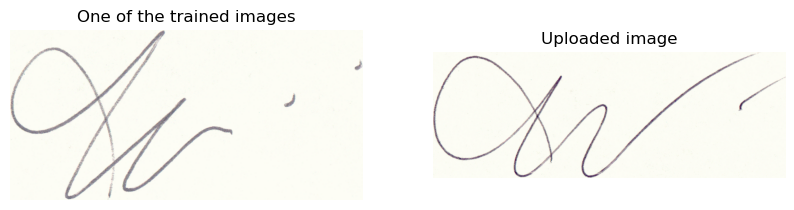

Forged Image: 75.4 %

Welcome to our project! Select from the options below:
[1] Upload image
[2] Run model on dataset and see accuracy
[3] Exit
Enter your choice:2

Running for Person id 049
Accuracy for train: 100.00 %
Accuracy for test: 75.00 %

Running for Person id 050
Accuracy for train: 90.00 %
Accuracy for test: 75.00 %

Running for Person id 051
Accuracy for train: 93.75 %
Accuracy for test: 75.00 %

Running for Person id 052
Accuracy for train: 86.36 %
Accuracy for test: 83.00 %

Running for Person id 053
Accuracy for train: 73.91 %
Accuracy for test: 40.00 %

Running for Person id 054
Accuracy for train: 95.83 %
Accuracy for test: 100.00 %

Running for Person id 055
Accuracy for train: 80.00 %
Accuracy for test: 50.00 %

Running for Person id 056
Accuracy for train: 82.35 %
Accuracy for test: 100.00 %

Running for Person id 057
Accuracy for train: 90.00 %
Accuracy for test: 50.00 %

Running for Person id 058
Accuracy for train: 100.00 %
Accuracy for test: 100.00 %

Running f

In [42]:
# Main portion
testModel()

### Our conclusion

As we can see, many of the accuracy percentages are near 100% which could potentially cause overfitting. This is due to the small number of images for each person (<10). Thus it is prone to judgement errors due to the limited insight provided by the narrow dataset.

What this means is that while CNN is generally a robust model, it is not a perfect solution and can fail due to the issues mentioned above. To counter this, we should implement a mix of the solutions proposed earlier (SSIM, MSE, Logistic Regression) in conjunction with CNN to give us more perspectives in determining the authenticity of a given signature.